<H1>予測モデルを作ってみよう</H1>
<p> 白ヤギコーポレーション　堅田</p>

<H2>1. 必要なライブラリを読み込む</H2>
<p>ここではデータの読み込みに必要なpandasを使用します</p>
<p>データはdataフォルダ直下にある"kc_house_data.csv"を使用します。</p>
<p>本データの入手元はhttps://www.kaggle.com/hhsgov/health-insurance-marketplace　です</p>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

<H2>2. データの読み込み</H2>
<p> pandasにはread_csvという関数が用意されており、それを用いれば簡単にCSVファイルを読み込むことができます</p>

In [2]:
dataset = pd.read_csv("data/kc_house_data.csv")

In [3]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
print("Number of Rows: %i   Number of Columns: %i"%dataset.shape)

Number of Rows: 21613   Number of Columns: 21


<h2>3. 要約統計量を出力する</h2>
<p> describeでデータ数、平均や中央値、標準偏差などの統計量が出力される</p>

In [120]:
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<H2>4. 最も基本的なデータの操作</H2>

<h3> インデックスを用いた行の指定</h3>
<p>インデックス番号0~10の行を抽出する</p>

In [6]:
dataset.ix[0:10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


<h3> カラム名を用いた列の指定</h3>
<p> 最初の10行の"price"と"bedrooms"の列を抽出する</p>

In [122]:
dataset.ix[:9][["price", "bedrooms"]]
#dataset.priceでも良い

,price,bedrooms
0,221900.0,3
1,538000.0,3
2,180000.0,2
3,604000.0,4
4,510000.0,3
5,1225000.0,4
6,257500.0,3
7,291850.0,3
8,229500.0,3
9,323000.0,3


<h3>カラム間の演算</h3>
<p>ここでは例として"sqft_above"と"sqft_basement"を合計した"sqft_total"を新たな列として加える</p>

In [7]:
dataset["sqft_total"] = dataset["sqft_above"] + dataset["sqft_basement"]
dataset.ix[0:9][["id", "sqft_above", "sqft_basement", "sqft_total"]]

,id,sqft_above,sqft_basement,sqft_total
0,7129300520,1180,0,1180
1,6414100192,2170,400,2570
2,5631500400,770,0,770
3,2487200875,1050,910,1960
4,1954400510,1680,0,1680
5,7237550310,3890,1530,5420
6,1321400060,1715,0,1715
7,2008000270,1060,0,1060
8,2414600126,1050,730,1780
9,3793500160,1890,0,1890


<h3>カラムに関数を適用する</h3>
<p>"date"は文字列になっているが、これを年と月で分解して新しいカラムとして追加する</p>

In [8]:
def date_str2year(x):
    #最初の４文字を取り出せば、年になる
    return int(x[:4])

def date_str2month(x):
    #5文字から6文字目を取り出せば、月になる
    return int(x[4:6])

In [9]:
dataset["date_year"] = dataset.date.apply(date_str2year)
dataset["date_month"] = dataset.date.apply(date_str2month)
dataset.ix[0:9][["id","date", "date_year", "date_month"]]

,id,date,date_year,date_month
0,7129300520,20141013T000000,2014,10
1,6414100192,20141209T000000,2014,12
2,5631500400,20150225T000000,2015,2
3,2487200875,20141209T000000,2014,12
4,1954400510,20150218T000000,2015,2
5,7237550310,20140512T000000,2014,5
6,1321400060,20140627T000000,2014,6
7,2008000270,20150115T000000,2015,1
8,2414600126,20150415T000000,2015,4
9,3793500160,20150312T000000,2015,3


<h3>ダミー変数を作る</h3>
<p> 一般的にはカテゴリ変数を機械学習のモデルに投入する際、0と1のダミー変数に変換する。</p>

In [10]:
dataset = pd.get_dummies(data=dataset, columns=["view"])

In [12]:
dataset.columns

Index([u'id', u'date', u'price', u'bedrooms', u'bathrooms', u'sqft_living',
       u'sqft_lot', u'floors', u'waterfront', u'condition', u'grade',
       u'sqft_above', u'sqft_basement', u'yr_built', u'yr_renovated',
       u'zipcode', u'lat', u'long', u'sqft_living15', u'sqft_lot15',
       u'sqft_total', u'date_year', u'date_month', u'view_0', u'view_1',
       u'view_2', u'view_3', u'view_4'],
      dtype='object')

In [13]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,sqft_living15,sqft_lot15,sqft_total,date_year,date_month,view_0,view_1,view_2,view_3,view_4
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,3,...,1340,5650,1180,2014,10,1.0,0.0,0.0,0.0,0.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,3,...,1690,7639,2570,2014,12,1.0,0.0,0.0,0.0,0.0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,3,...,2720,8062,770,2015,2,1.0,0.0,0.0,0.0,0.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,5,...,1360,5000,1960,2014,12,1.0,0.0,0.0,0.0,0.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,3,...,1800,7503,1680,2015,2,1.0,0.0,0.0,0.0,0.0


<h3>条件でのフィルタリング</h3>
<p>bedroomsが1以下の物件のみを抽出する</p>

In [14]:
dataset[dataset.bedrooms<1]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,sqft_living15,sqft_lot15,sqft_total,date_year,date_month,view_0,view_1,view_2,view_3,view_4
875,6306400140,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,3,...,2360,4000,3064,2014,6,0.0,0.0,1.0,0.0,0.0
3119,3918400017,20150205T000000,380000.0,0,0.00,1470,979,3.0,0,3,...,1470,1399,1470,2015,2,0.0,0.0,1.0,0.0,0.0
3467,1453602309,20140805T000000,288000.0,0,1.50,1430,1650,3.0,0,3,...,1430,1650,1430,2014,8,1.0,0.0,0.0,0.0,0.0
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,2,...,2170,6000,390,2014,10,1.0,0.0,0.0,0.0,0.0
6994,2954400190,20140624T000000,1295650.0,0,0.00,4810,28008,2.0,0,3,...,4740,35061,4810,2014,6,1.0,0.0,0.0,0.0,0.0
8477,2569500210,20141117T000000,339950.0,0,2.50,2290,8319,2.0,0,3,...,2500,8751,2290,2014,11,1.0,0.0,0.0,0.0,0.0
8484,2310060040,20140925T000000,240000.0,0,2.50,1810,5669,2.0,0,3,...,1810,5685,1810,2014,9,1.0,0.0,0.0,0.0,0.0
9773,3374500520,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,3,...,2520,8050,2460,2015,4,1.0,0.0,0.0,0.0,0.0
9854,7849202190,20141223T000000,235000.0,0,0.00,1470,4800,2.0,0,3,...,1060,7200,1470,2014,12,1.0,0.0,0.0,0.0,0.0
12653,7849202299,20150218T000000,320000.0,0,2.50,1490,7111,2.0,0,3,...,1500,4675,1490,2015,2,1.0,0.0,0.0,0.0,0.0


<h3>複数条件でのデータ抽出</h3>
<p>ここではbedroomsもbathroomsも1以下の物件を抽出</p>

In [15]:
dataset[(dataset["bedrooms"] <1) & (dataset["bathrooms"] <1)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,sqft_living15,sqft_lot15,sqft_total,date_year,date_month,view_0,view_1,view_2,view_3,view_4
875,6306400140,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,3,...,2360,4000,3064,2014,6,0.0,0.0,1.0,0.0,0.0
3119,3918400017,20150205T000000,380000.0,0,0.00,1470,979,3.0,0,3,...,1470,1399,1470,2015,2,0.0,0.0,1.0,0.0,0.0
6994,2954400190,20140624T000000,1295650.0,0,0.00,4810,28008,2.0,0,3,...,4740,35061,4810,2014,6,1.0,0.0,0.0,0.0,0.0
9773,3374500520,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,3,...,2520,8050,2460,2015,4,1.0,0.0,0.0,0.0,0.0
9854,7849202190,20141223T000000,235000.0,0,0.00,1470,4800,2.0,0,3,...,1060,7200,1470,2014,12,1.0,0.0,0.0,0.0,0.0
14423,9543000205,20150413T000000,139950.0,0,0.00,844,4269,1.0,0,4,...,1380,9600,844,2015,4,1.0,0.0,0.0,0.0,0.0
18379,1222029077,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,3,...,1920,224341,384,2014,10,1.0,0.0,0.0,0.0,0.0
19452,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,1,...,1620,22850,290,2014,9,1.0,0.0,0.0,0.0,0.0


<h2>5. 分布の確認(データ可視化入門）</h2>

<h3>ヒストグラム</h3>
<p>ひとつの数値データのバラツキを可視化する際にはヒストグラムが有効</p>

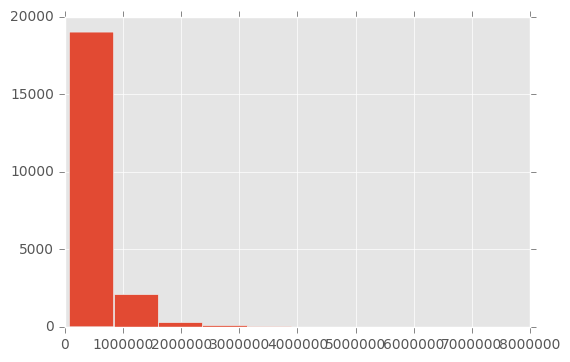

In [16]:
dataset.price.hist()

<p>logスケールにしたい場合は、Numpyのlog関数を使って行う</p>

(array([  6.30000000e+01,   5.33000000e+02,   3.97700000e+03,
          7.18300000e+03,   6.34500000e+03,   2.54100000e+03,
          7.33000000e+02,   1.93000000e+02,   3.80000000e+01,
          7.00000000e+00]),
 array([ 11.22524339,  11.68839214,  12.15154089,  12.61468964,
         13.07783839,  13.54098714,  14.00413589,  14.46728464,
         14.93043339,  15.39358214,  15.85673089]),
 <a list of 10 Patch objects>)

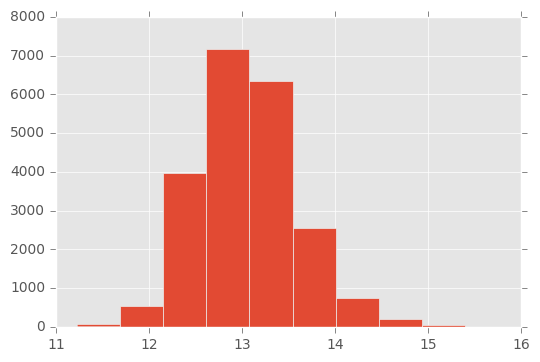

In [17]:
plt.hist(np.log(dataset.price))

<h3>散布図</h3>
<p>2つの変数のバラツキや相関関係を確認するには散布図を使う</p>

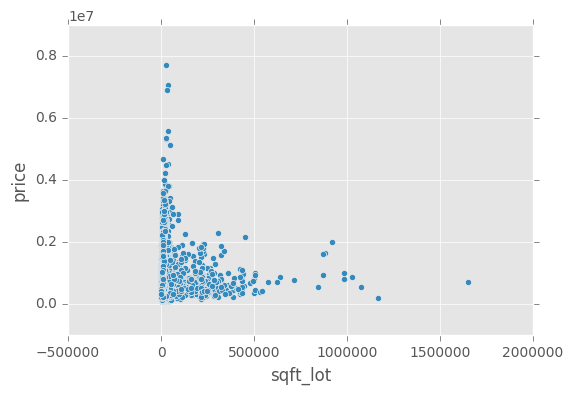

In [18]:
dataset.plot(kind='scatter', x='sqft_lot', y='price')

<h3>Group Byで集計して棒グラフ</h3>
<p> "condition"はカテゴリ変数なので、この変数をキーにして"price"の平均を集計し、それを棒グラフにします</p>

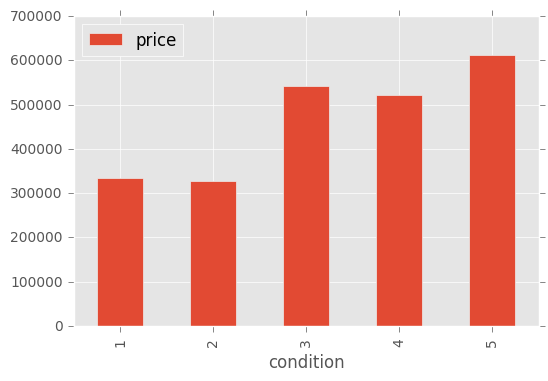

In [19]:
price_by_condition = dataset.groupby("condition").aggregate({"price":np.mean}).reset_index()
price_by_condition.plot.bar(x="condition")

<h3>箱ヒゲ図(Boxplot) </h3>
<p>棒グラフにすると平均の比較はできますが、分布全体の比較はできません。そこで箱ヒゲ図の出番です。</p>
<p>各要因ごとに分布を比較したいときに箱ヒゲ図はとても便利です</p>

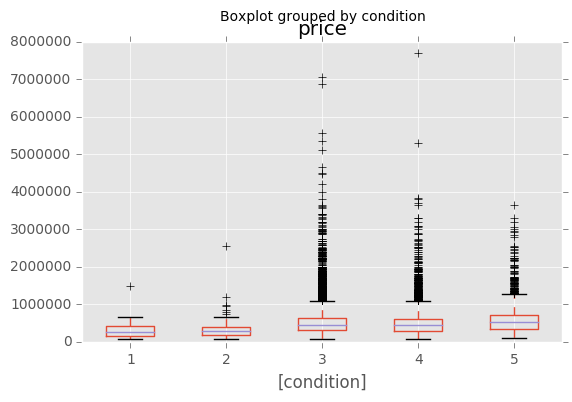

In [20]:
dataset[["condition", "price"]].boxplot(by="condition")

<h2>6. 欠損の確認とその対応</h2>
<p> 欠損値がある場合、本来はその発生原因を理解する必要があります。なぜなら、その原因によって対応方針は異なるためです。</p>
<p>ここでは、欠損があるカラムをチェックします</p>
<br>
<p>まずあまり効率的ではないものの、pandasに慣れるため各列ごとにチェックしていきます</p>

In [21]:
col_names = dataset.columns
for col_name in col_names:
    missing_num = sum(pd.isnull(dataset[col_name]))
    print(col_name, "; # of missing record: ", missing_num)

('id', '; # of missing record: ', 0)
('date', '; # of missing record: ', 0)
('price', '; # of missing record: ', 0)
('bedrooms', '; # of missing record: ', 0)
('bathrooms', '; # of missing record: ', 0)
('sqft_living', '; # of missing record: ', 0)
('sqft_lot', '; # of missing record: ', 0)
('floors', '; # of missing record: ', 0)
('waterfront', '; # of missing record: ', 0)
('condition', '; # of missing record: ', 0)
('grade', '; # of missing record: ', 0)
('sqft_above', '; # of missing record: ', 0)
('sqft_basement', '; # of missing record: ', 0)
('yr_built', '; # of missing record: ', 0)
('yr_renovated', '; # of missing record: ', 0)
('zipcode', '; # of missing record: ', 0)
('lat', '; # of missing record: ', 0)
('long', '; # of missing record: ', 0)
('sqft_living15', '; # of missing record: ', 0)
('sqft_lot15', '; # of missing record: ', 0)
('sqft_total', '; # of missing record: ', 0)
('date_year', '; # of missing record: ', 0)
('date_month', '; # of missing record: ', 0)
('view_0'

<p>applyを使って欠損を確認する方法</p>

In [22]:
missing_check = dataset.copy()
missing_check = missing_check.apply(pd.isnull, axis = 1)
missing_check.apply(sum, axis = 0)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
sqft_total       0
date_year        0
date_month       0
view_0           0
view_1           0
view_2           0
view_3           0
view_4           0
dtype: int64

<p>欠損はない。もしあれば、dataset.fillna()を使って補完するか、dataset.dropna()で欠損があるレコードを削除する</p>

<h2>7. 特徴量の作成</h2>
<p> 既存の特徴量を使って（ターゲットの変数である"price"を除いて）新しい特徴量を作りましょう</p>

In [137]:
dataset["sqft_living_div_sqft_living15"] = dataset["sqft_living"] / (dataset["sqft_living15"] + 0.001)

In [288]:
"your code is here"

'your code is here'

<h2>8. Scikit Learnを用いた予測モデルの構築</h2>

<p>早速、機械学習モデルを使ってみよう</p>
<p>ここでは以下の機械学習アルゴリズムを試します</p>
<li>線形回帰モデル</li>
<li>決定木</li>
<li>ランダムフォレスト</li>
<li>サポートベクトル回帰</li>
<p>また、モデル評価はMSEとします</p>

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

<h3>ターゲット変数と特徴量を指定してsklearnに渡せるように準備する</h3>

In [24]:
target_col = "price"
exclude_cols = ["price", "id", "date"]
feature_cols = [col for col in dataset.columns if col not in exclude_cols]

In [25]:
feature_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'sqft_total',
 'date_year',
 'date_month',
 'view_0',
 'view_1',
 'view_2',
 'view_3',
 'view_4']

In [26]:
y = np.array(dataset[target_col])
X = np.array(dataset[feature_cols])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234)
X_train1, X_train2, y_train1, y_train2 = train_test_split(X_train, y_train, test_size = 0.3, random_state=1234)

<h2>8-1. アルゴリズムの選択</h2>

<h3>線形回帰モデル</h3>

In [29]:
lm = LinearRegression()
lm.fit(X_train1, y_train1)
y_pred2 = lm.predict(X_train2)
lm_mse = mean_squared_error(y_train2, y_pred2)
print "LinerRegression MSE: ", lm_mse

LinerRegression MSE:  42812243520.3


<h3>回帰木</h3>

In [30]:
dt = DecisionTreeRegressor()
dt.fit(X_train1, y_train1)
y_pred2 = dt.predict(X_train2)
dt_mse = mean_squared_error(y_train2, y_pred2)
print "DT MSE: ", dt_mse

DT MSE:  35408648695.1


<h3>ランダムフォレスト</h3>

In [31]:
rf = RandomForestRegressor(random_state=1234)
rf.fit(X_train1, y_train1)
y_pred2 = rf.predict(X_train2)
rf_mse = mean_squared_error(y_train2, y_pred2)
print "RandomForest MSE: ", rf_mse

RandomForest MSE:  22527504257.2


In [33]:
algos = ["LinerRegression", "DecisionTree", "RandomForest"]
mses = [lm_mse,dt_mse, rf_mse]
print "Best Alogorithms : ", algos[np.argmin(mses)]

Best Alogorithms :  RandomForest


<h2>8-2. 変数選択</h2>
<h3>どんな変数が効いているのかを調べて見るため、feature importanceを見て見る</h3>

In [34]:
max_imp = max(rf.feature_importances_)
for col, imp in sorted(zip(feature_cols, rf.feature_importances_), key = lambda x: x[1], reverse=True):
    print col, "\t", round(imp/max_imp * 100, 2)

grade 	100.0
sqft_living 	71.46
sqft_total 	68.87
lat 	64.24
long 	25.24
sqft_living15 	15.52
waterfront 	11.84
yr_built 	11.2
sqft_above 	6.19
zipcode 	5.97
sqft_lot 	5.84
sqft_lot15 	4.94
bathrooms 	2.49
sqft_basement 	2.3
date_month 	2.24
view_4 	1.58
view_0 	1.46
condition 	1.3
bedrooms 	0.86
yr_renovated 	0.85
floors 	0.7
date_year 	0.46
view_3 	0.36
view_2 	0.26
view_1 	0.22


<h3>変数増加法で変数選択をしてみる</h3>

In [35]:
import copy

In [41]:
class GreedyForwardSelection(object):
    
    def __init__(self, X_train, y_train, feature_names, clf):
        
        X_train1, X_train2, y_train1, y_train2 = train_test_split(X_train, y_train, test_size = 0.3, random_state=1234)
        
        self.X_train1 = X_train1
        self.y_train1 = y_train1
        self.X_train2 = X_train2
        self.y_train2 = y_train2
        
        self.feature_names = feature_names
        
        self.clf = clf
        
        self.mse_history = [np.inf]
        
        #列数をMとする
        self.M = X_train.shape[1]
        
        #特徴量（インデックスで持っておく）
        self.feature_index = np.arange(self.M)
        
        #どの特徴量を使うかを1/0でコントロールする
        self.features_bool = np.zeros(self.M, dtype = int)

        #追加候補となる特徴量
        self.candidate_features = self.feature_index[self.features_bool==0]

        #すでに追加すると決めた特徴量
        self.include_features = []
    
    #与えた特徴量で精度を返す
    def get_mse_by_candidate_features(self, feature_index):
        self.clf.fit(self.X_train1[:, feature_index], self.y_train1)
        
        y_pred2 = self.clf.predict(self.X_train2[:, feature_index])
        mse_ = mean_squared_error(self.y_train2, y_pred2)
        return mse_
    
    #候補の特徴量の中でベストの精度を達成する特徴量を見つける
    def search_best_candidate(self, include_features, candidate_features):
        best_score = np.inf
        best_candidate_feature = None
        for candidate_feature in candidate_features:
            tmp_include_features = copy.deepcopy(include_features)
            tmp_include_features.append(candidate_feature)
            
            cand_mse = self.get_mse_by_candidate_features(tmp_include_features)
            if cand_mse < best_score:
                best_score = cand_mse
                best_candidate_feature = candidate_feature
        return best_score, best_candidate_feature
    

    def fit(self):
        
        for i in xrange(self.M):
            
            best_score, best_candidate_feature = self.search_best_candidate(include_features = self.include_features, candidate_features = self.candidate_features)
            if self.mse_history[-1] > best_score:
                self.mse_history.append(best_score)
                self.include_features.append(best_candidate_feature)
                self.features_bool[self.feature_index==best_candidate_feature] = 1                
                self.candidate_features = self.feature_index[self.features_bool==0]
                
                print "Newly Added Feature index: ", self.feature_names[best_candidate_feature], "\tMSE score: ", best_score
                
            else:
                break
        
        return self.include_features



In [42]:
GFS = GreedyForwardSelection(X_train = X_train, y_train=y_train, feature_names= feature_cols, clf = RandomForestRegressor(random_state=1234) )

In [43]:
selected_feature_index = GFS.fit()

Newly Added Feature index:  grade 	MSE score:  69167238833.3
Newly Added Feature index:  zipcode 	MSE score:  38579439728.9
Newly Added Feature index:  view_4 	MSE score:  32541956711.1
Newly Added Feature index:  sqft_living 	MSE score:  30681151297.4
Newly Added Feature index:  lat 	MSE score:  24834994081.1
Newly Added Feature index:  yr_built 	MSE score:  22323646347.9
Newly Added Feature index:  bedrooms 	MSE score:  22192952594.8
Newly Added Feature index:  view_3 	MSE score:  21412897293.9
Newly Added Feature index:  view_2 	MSE score:  20953136806.5


<h3>改めて、変数選択後の精度を確認してみましょう</h3>

In [403]:
rf = RandomForestRegressor(random_state=1234)
rf.fit(X_train1[:,selected_feature_index ], y_train1)
y_pred2 = rf.predict(X_train2[:, selected_feature_index])
rf_mse = mean_squared_error(y_train2, y_pred2)
print "RandomForest MSE: ", rf_mse

RandomForest MSE:  20953136806.5


<h2>8-3. クロスバリデーションによるパラメーターのチューニング</h2>

In [404]:
rf = RandomForestRegressor(random_state=1234)

In [418]:
params = {"n_estimators": [10,50, 100], "max_depth":[5, 10, 50]}

In [419]:
gscv = GridSearchCV(rf, param_grid=params, verbose=1, cv = 3, scoring='mean_squared_error')

In [420]:
gscv.fit(X_train1[:, selected_feature_index], y_train1)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   26.5s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=1, oob_score=False, random_state=1234,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 50, 100], 'max_depth': [5, 10, 50]},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=1)

In [421]:
gscv.best_params_

{'max_depth': 50, 'n_estimators': 100}

<h3>パラメーターチューニング後のスコアを見てみましょう</h3>

In [422]:
rf = RandomForestRegressor(n_estimators=100, max_depth=50, random_state=1234)
rf.fit(X_train1[:,selected_feature_index ], y_train1)
y_pred2 = rf.predict(X_train2[:, selected_feature_index])
rf_mse = mean_squared_error(y_train2, y_pred2)
print "RandomForest MSE: ", rf_mse

RandomForest MSE:  20633412513.5


<h2>8-4. テストデータへ適用して精度を確認する</h2>

<h3>モデルの学習</h3>

In [442]:
rf = RandomForestRegressor(n_estimators=100, max_depth=50, random_state=1234)
rf.fit(X_train[:, selected_feature_index], y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=1234,
           verbose=0, warm_start=False)

In [443]:
y_pred_on_test = rf.predict(X_test[:, selected_feature_index])
rf_mse = mean_squared_error(y_test, y_pred_on_test)
print "RandomForest MSE: ", rf_mse

RandomForest MSE:  22799854840.0


<h2>8-5. 誤差の様子を可視化して確認</h2>

<h3>予測数値と実際の値の散布図</h3>

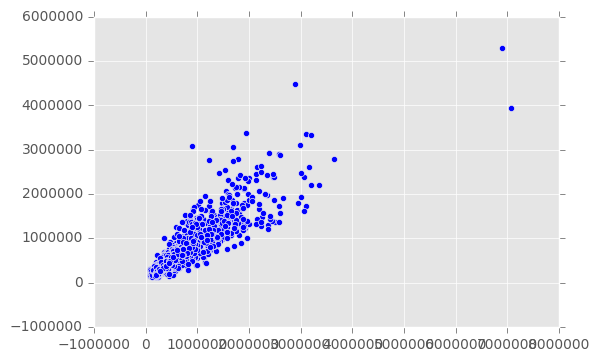

In [444]:
plt.scatter(y_test, y_pred_on_test)

<h3>誤差のヒストグラム</h3>

Mean:  -0.032928343973
Std:  0.217716422129


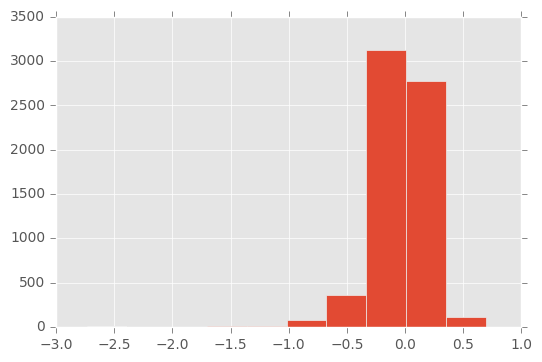

In [446]:
error_rate = (y_test - y_pred_on_test)/y_test
plt.hist( error_rate )
print "Mean: ", np.mean(error_rate)
print "Std: ", np.std(error_rate)